# Tensorflow classifier model with titanic dataset

In [90]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
dttrain = pd.read_csv("https://storage.googleapis.com/tf-datasets/titanic/train.csv")
dteval = pd.read_csv("https://storage.googleapis.com/tf-datasets/titanic/eval.csv")

In [18]:
dttrain.columns

Index(['survived', 'sex', 'age', 'n_siblings_spouses', 'parch', 'fare',
       'class', 'deck', 'embark_town', 'alone'],
      dtype='object')

In [16]:
dteval.columns

Index(['survived', 'sex', 'age', 'n_siblings_spouses', 'parch', 'fare',
       'class', 'deck', 'embark_town', 'alone'],
      dtype='object')

In [19]:
Y_train= dttrain.pop("survived")
Y_eval = dteval.pop("survived")

In [21]:
dttrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 627 entries, 0 to 626
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sex                 627 non-null    object 
 1   age                 627 non-null    float64
 2   n_siblings_spouses  627 non-null    int64  
 3   parch               627 non-null    int64  
 4   fare                627 non-null    float64
 5   class               627 non-null    object 
 6   deck                627 non-null    object 
 7   embark_town         627 non-null    object 
 8   alone               627 non-null    object 
dtypes: float64(2), int64(2), object(5)
memory usage: 44.2+ KB


In [42]:
cat_features = ["sex","embark_town","class","deck","alone",'n_siblings_spouses','parch']
num_features = ['age',"fare"]

<AxesSubplot:>

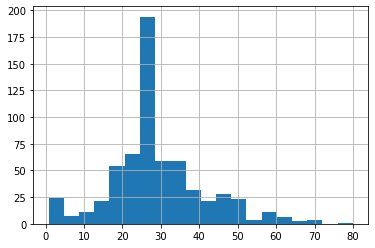

In [24]:
## analysis 

dttrain.age.hist(bins=20)

<AxesSubplot:>

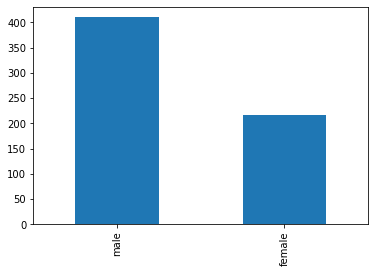

In [29]:
dttrain.sex.value_counts().plot(kind="bar")

<AxesSubplot:>

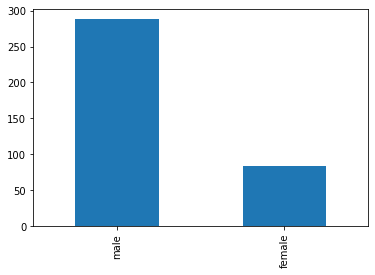

In [35]:
dttrain[dttrain["alone"]=='y']["sex"].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='sex,survived'>

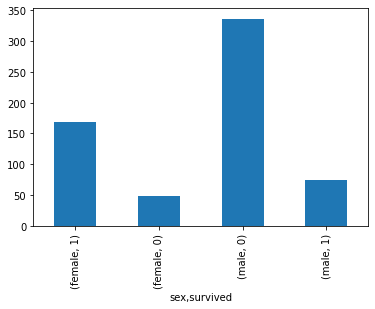

In [41]:
## combining two differents data frames 

pd.concat([dttrain,Y_train], axis=1).groupby("sex").survived.value_counts().plot(kind='bar')

## creating a feature column using tensorflow




In [44]:
import tensorflow as tf

In [46]:
feature_columns=[]

for col in cat_features:
    vocabs = dttrain[col].unique()
    feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(col, vocabs))
    
for col in num_features:
    feature_columns.append(tf.feature_column.numeric_column(col, dtype=tf.float32))

In [47]:
feature_columns

[VocabularyListCategoricalColumn(key='sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='embark_town', vocabulary_list=('Southampton', 'Cherbourg', 'Queenstown', 'unknown'), dtype=tf.string, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='class', vocabulary_list=('Third', 'First', 'Second'), dtype=tf.string, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='deck', vocabulary_list=('unknown', 'C', 'G', 'A', 'B', 'D', 'F', 'E'), dtype=tf.string, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='alone', vocabulary_list=('n', 'y'), dtype=tf.string, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='n_siblings_spouses', vocabulary_list=(1, 0, 3, 4, 2, 5, 8), dtype=tf.int64, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='parch', vocabulary_list=(0, 1, 2, 5, 3, 4), dtype=tf.int6

In [65]:
a=dict(dttrain)

In [67]:
a["sex"]

0        male
1      female
2      female
3      female
4        male
        ...  
622      male
623      male
624    female
625    female
626      male
Name: sex, Length: 627, dtype: object

### making an input function

In [59]:
def make_input_function(xdata, xlabels, shuffle=True, epochs=30,batch_size=32):
    def input_function():
        dt = tf.data.Dataset.from_tensor_slices((dict(xdata),xlabels))
        
        if shuffle:
            dt= dt.shuffle(1000)
        dt = dt.batch(batch_size).repeat(epochs)
        return dt
    return input_function


In [60]:
## now convert train and test data to tensor objects

train_data = make_input_function(dttrain,Y_train)
eval_data = make_input_function(dteval, Y_eval, shuffle=False, epochs=1)

In [61]:
## create a linear regression model as below

model = tf.estimator.LinearClassifier(feature_columns=feature_columns)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\vamsee\\AppData\\Local\\Temp\\tmpk_r8tli5', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [62]:
model.train(train_data)
result = model.evaluate(eval_data)

INFO:tensorflow:Calling model_fn.


C:\Users\vamsee\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\base_layer_v1.py:1700: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\vamsee\AppData\Local\Temp\tmpk_r8tli5\model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...
INFO:tensorflow:loss = 0.6931472, step = 0
INFO:tensorflow:global_step/sec: 329.192
INFO:tensorflow:loss = 0.39349505, step = 100 (0.304 sec)
INFO:tensorflow:global_step/sec: 678.031
INFO:tensorflow:loss = 0.5985456, step = 200 (0.147 sec)
INFO:tensorflow:global_step/sec: 633.94
INFO:tensorflow:loss = 0.28492147, step = 300 (0.158 sec)
INFO:tensorflow:global_step/sec: 641.454
INFO:tensorflow:loss = 0.49289858, step = 400 (0.156 sec)
INFO:tensorflow:global_step/sec: 631.03
INFO:tensorflow:loss = 0.3964571, step = 500 (0.158 sec)
INFO:tens

In [63]:
result

{'accuracy': 0.7613636,
 'accuracy_baseline': 0.625,
 'auc': 0.83899605,
 'auc_precision_recall': 0.7793656,
 'average_loss': 0.47823533,
 'label/mean': 0.375,
 'loss': 0.46503198,
 'precision': 0.7,
 'prediction/mean': 0.33532432,
 'recall': 0.6363636,
 'global_step': 600}

In [69]:
## now predict the result 

result =list( model.predict(eval_data))

INFO:tensorflow:Calling model_fn.


C:\Users\vamsee\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\base_layer_v1.py:1700: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\vamsee\AppData\Local\Temp\tmpk_r8tli5\model.ckpt-600
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [89]:
for i in range(10):
    print(dteval.loc[i])
    print("the probability of surviving is {}".format(result[i]['probabilities'][1]))
    print("_________________")

sex                          male
age                            35
n_siblings_spouses              0
parch                           0
fare                         8.05
class                       Third
deck                      unknown
embark_town           Southampton
alone                           y
Name: 0, dtype: object
the probability of surviving is 0.03553919866681099
_________________
sex                          male
age                            54
n_siblings_spouses              0
parch                           0
fare                      51.8625
class                       First
deck                            E
embark_town           Southampton
alone                           y
Name: 1, dtype: object
the probability of surviving is 0.2634845972061157
_________________
sex                        female
age                            58
n_siblings_spouses              0
parch                           0
fare                        26.55
class                       First

In [1]:
## quick tensorflow implementation

import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [24]:
train_data = pd.read_csv("https://storage.googleapis.com/tf-datasets/titanic/train.csv")
eval_data = pd.read_csv("https://storage.googleapis.com/tf-datasets/titanic/eval.csv")

In [25]:
train_data.head()

,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,1,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,1,female,35.0,1,0,53.1000,First,C,Southampton,n
4,0,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [26]:
Y_train = train_data.pop("survived")
Y_eval = eval_data.pop("survived")

In [27]:
train_data.head(2)

,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,female,38.0,1,0,71.2833,First,C,Cherbourg,n


In [28]:
cat_columns =["sex","class","deck","embark_town","alone","n_siblings_spouses","parch"]
num_columns=["age","fare"]

In [37]:
input_features=[]

for col in cat_columns:
    uniq_vals=train_data[col].unique()
    input_features.append(tf.feature_column.categorical_column_with_vocabulary_list(col,uniq_vals))

for col in num_columns:
    input_features.append(tf.feature_column.numeric_column(col, dtype=tf.float64))

In [38]:
input_features

[VocabularyListCategoricalColumn(key='sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='class', vocabulary_list=('Third', 'First', 'Second'), dtype=tf.string, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='deck', vocabulary_list=('unknown', 'C', 'G', 'A', 'B', 'D', 'F', 'E'), dtype=tf.string, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='embark_town', vocabulary_list=('Southampton', 'Cherbourg', 'Queenstown', 'unknown'), dtype=tf.string, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='alone', vocabulary_list=('n', 'y'), dtype=tf.string, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='n_siblings_spouses', vocabulary_list=(1, 0, 3, 4, 2, 5, 8), dtype=tf.int64, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='parch', vocabulary_list=(0, 1, 2, 5, 3, 4), dtype=tf.int6

In [49]:
### creating the tensor input function

def make_input_function(features, label, epoches, batch_size, Shuffle=True):
    def input_function():
        ## create tensor slices
        dt = tf.data.Dataset.from_tensor_slices((dict(features),label))
        if Shuffle:
            dt= dt.shuffle(1000)
        dt = dt.batch(batch_size).repeat(epoches)
        return dt
    return input_function


In [44]:
def make_input_function(xdata, xlabels, shuffle=True, epochs=30,batch_size=32):
    def input_function():
        dt = tf.data.Dataset.from_tensor_slices((dict(xdata),xlabels))
        
        if shuffle:
            dt= dt.shuffle(1000)
        dt = dt.batch(batch_size).repeat(epochs)
        return dt
    return input_function


In [50]:
## create tensor model

model = tf.estimator.LinearClassifier(feature_columns=input_features)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\vamsee\\AppData\\Local\\Temp\\tmpv656mv3x', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [51]:
train_input_func= make_input_function(train_data, Y_train, 10,1)
eval_input_func= make_input_function(eval_data, Y_eval,1,1)

In [52]:
train_input_func

<function __main__.make_input_function.<locals>.input_function()>

In [53]:
model.train(train_input_func)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\vamsee\AppData\Local\Temp\tmpv656mv3x\model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...
INFO:tensorflow:loss = 0.6931472, step = 0
INFO:tensorflow:global_step/sec: 265.683
INFO:tensorflow:loss = 0.19037248, step = 100 (0.392 sec)
INFO:tensorflow:global_step/sec: 493.087
INFO:tensorflow:loss = 0.2696311, step = 200 (0.199 sec)
INFO:tensorflow:global_step/sec: 457.067
INFO:tensorflow:loss = 0.089249395, step = 300 (0.210 sec)
INFO:tensorflow:global_step/sec: 489.431
INFO:tensorflow:loss = 0.87969685, step = 400 (0.205 sec)
INFO:tensorflow:global_step/sec: 463.984
INFO:tensorflow:loss = 0.0935

In [54]:
res = model.evaluate(eval_input_func)

INFO:tensorflow:Calling model_fn.


C:\Users\vamsee\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\base_layer_v1.py:1700: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2022-02-04T09:58:16
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\vamsee\AppData\Local\Temp\tmpv656mv3x\model.ckpt-6270
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 1.41552s
INFO:tensorflow:Finished evaluation at 2022-02-04-09:58:17
INFO:tensorflow:Saving dict for global step 6270: accuracy = 0.7689394, accuracy_baseline = 0.625, auc = 0.83783287, auc_precision_recall = 0.7852539, average_loss = 0.48039073, global_step = 6270, label/mean = 0.375, loss = 0.48039073, precision = 0.6792453, prediction/mean = 0.41788626, recall = 0.72727275
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 6270: C:\Users\vamsee\AppData\Local\Temp\tmpv656mv3x\model.ckpt-6270


In [57]:
res = list(model.predict(eval_input_func))

INFO:tensorflow:Calling model_fn.


C:\Users\vamsee\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\base_layer_v1.py:1700: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\vamsee\AppData\Local\Temp\tmpv656mv3x\model.ckpt-6270
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [64]:
print(eval_data.loc[0])
print(res[0]["probabilities"][1])
print(Y_eval.loc[0])

sex                          male
age                            35
n_siblings_spouses              0
parch                           0
fare                         8.05
class                       Third
deck                      unknown
embark_town           Southampton
alone                           y
Name: 0, dtype: object
0.081491485
0


In [66]:
np.ceil(res[0]["probabilities"][1])

1.0

In [ ]:
pos_counter=0
neg_counter=0
for i in range(len(eval_data)):
    if 